# 09 데이터분석 프로젝트

In [19]:
import site
site.getsitepackages()

['c:\\Python313', 'c:\\Python313\\Lib\\site-packages']

In [24]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install missingno







In [26]:
# PC에서 그림 설정

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)


plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [4, 2.5]})

3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
2.2.3
2.2.5
0.13.2
0.5.2


In [ ]:
# PC에서 한글 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')


plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})    

In [21]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [22]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [30]:
!{sys.executable} -m pip install pyreadstat


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------- ------------- 1.6/2.4 MB 17.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.4 MB 17.6 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 3.2 MB/s eta 0:00:00


In [34]:
raw_welfare = pd.read_spss('C:/2025-BDA-B-ch09/data/Koweps_hpwc14_2019_beta2.sav')

raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [35]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [36]:
welfare = raw_welfare.copy()

In [37]:
welfare.shape

(14418, 830)

In [38]:
welfare = welfare.rename(columns= {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [39]:
welfare.sex.dtypes

dtype('float64')

In [40]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [41]:
welfare.sex.isna().sum()

np.int64(0)

In [42]:
welfare['sex'] = np.where(welfare.sex == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

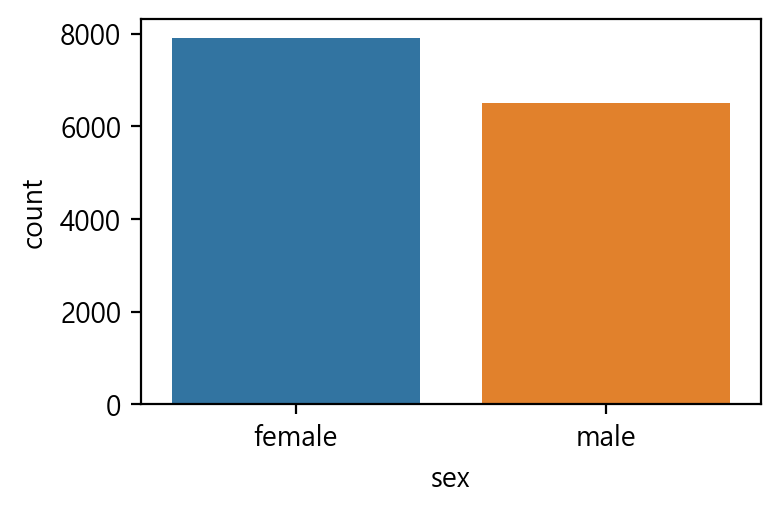

In [43]:
sns.countplot(welfare, x='sex', hue='sex');

# 11주차


In [44]:
welfare['income'].dtypes 

dtype('float64')

In [45]:
welfare['income'].describe()  

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

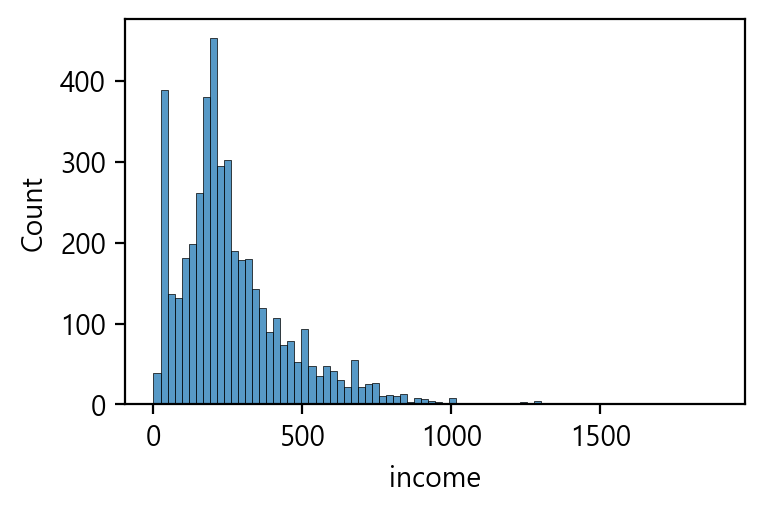

In [46]:
sns.histplot(data = welfare, x = 'income')

In [47]:
welfare['income'].describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

In [48]:
welfare['income'].isna().sum() 

np.int64(9884)

In [49]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

np.int64(9884)

In [50]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


<Axes: xlabel='sex', ylabel='mean_income'>

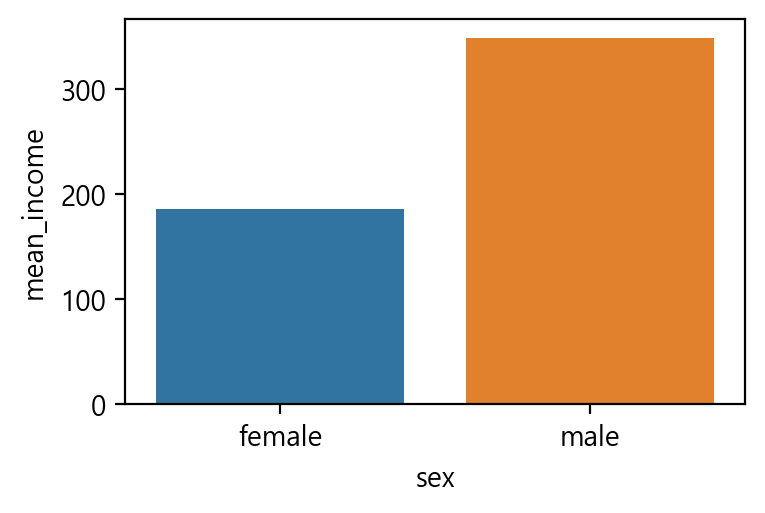

In [52]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income',hue='sex')  

In [53]:
welfare['birth'].dtypes 

dtype('float64')

In [54]:

welfare['birth'].describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

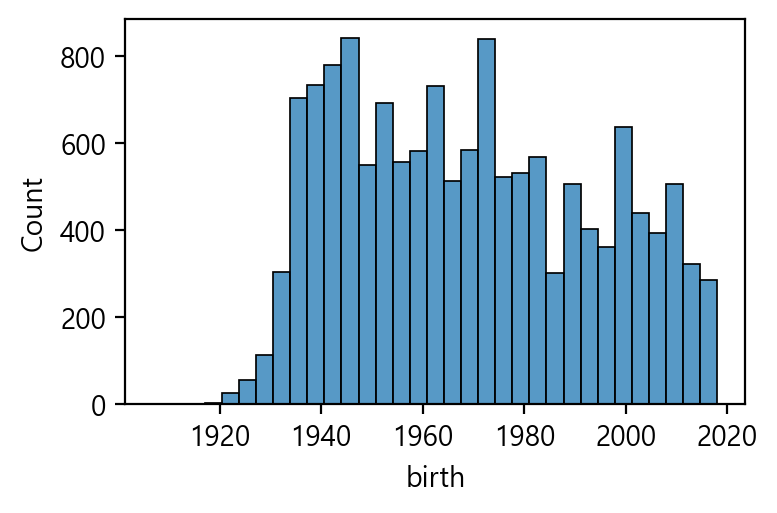

In [55]:
sns.histplot(data = welfare, x = 'birth')

In [56]:
welfare['birth'].isna().sum() 

np.int64(0)

In [57]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

np.int64(0)

In [58]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)  # 나이 변수 만들기
welfare['age'].describe()  

count    14418.00
mean        50.72
std         24.40
min          2.00
25%         30.00
50%         52.00
75%         72.00
max        113.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

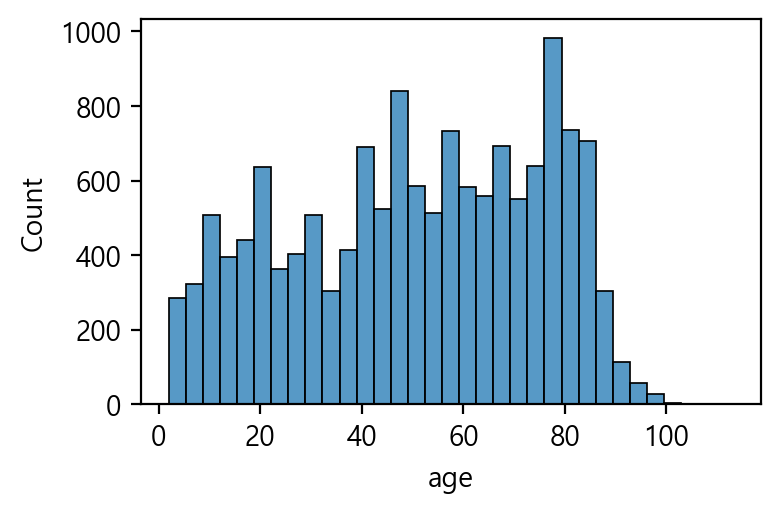

In [59]:
sns.histplot(data = welfare, x = 'age')

In [60]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.00
20.0,121.33
21.0,136.40
22.0,123.67
23.0,179.68


<Axes: xlabel='age', ylabel='mean_income'>

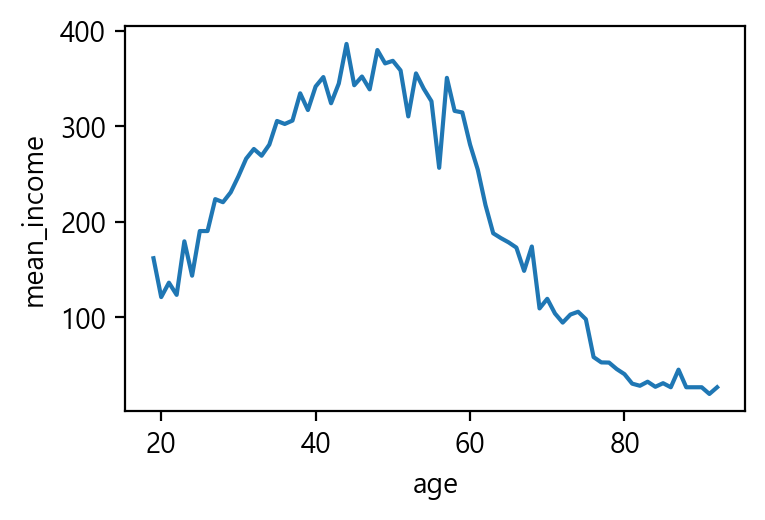

In [61]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')  

In [62]:
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [63]:
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

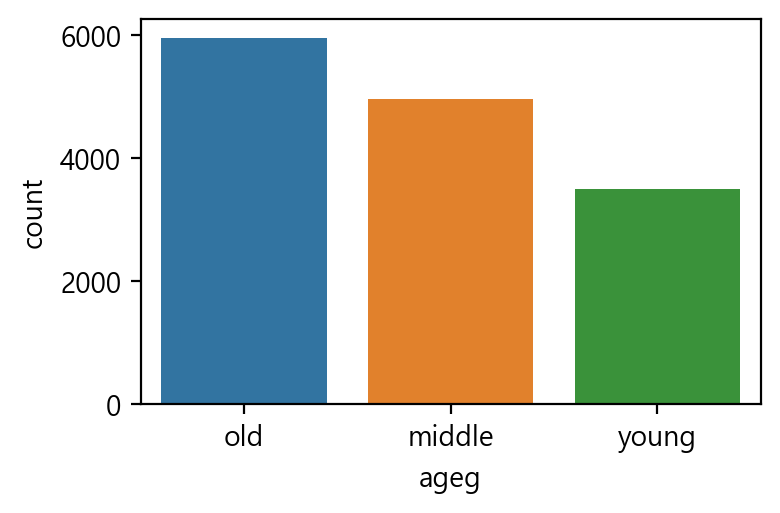

In [65]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg', hue = 'ageg')

In [66]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.16
1,old,140.13
2,young,195.66


<Axes: xlabel='ageg', ylabel='mean_income'>

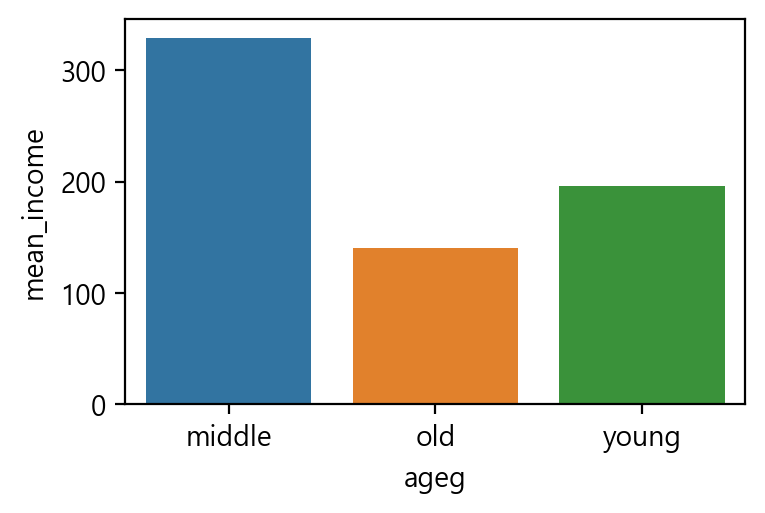

In [68]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',hue='ageg')

<Axes: xlabel='ageg', ylabel='mean_income'>

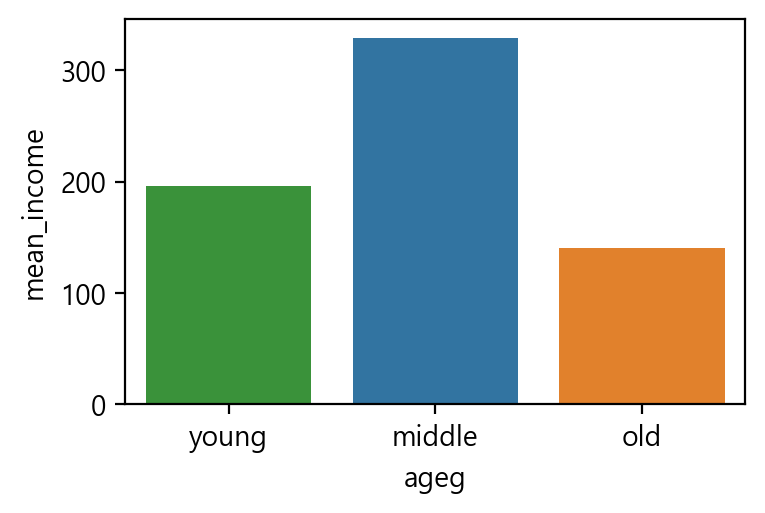

In [70]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'],hue='ageg')

In [71]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.48
1,middle,male,409.54
2,old,female,90.23
3,old,male,204.57
4,young,female,189.82
5,young,male,204.91


<Axes: xlabel='ageg', ylabel='mean_income'>

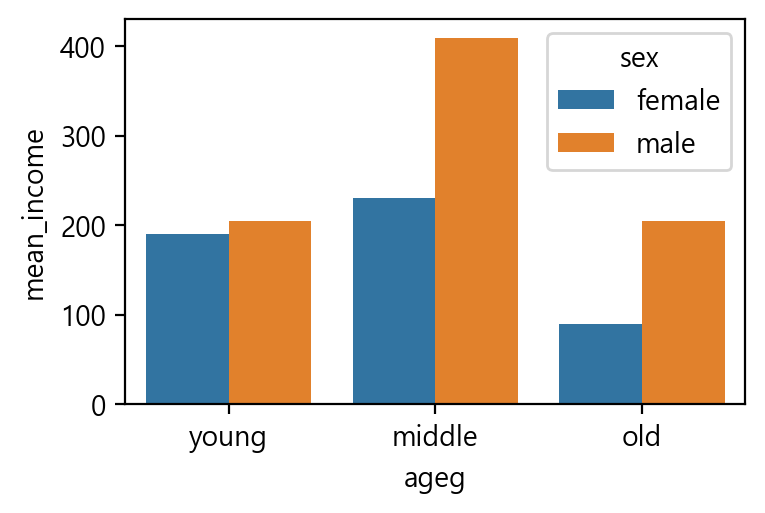

In [72]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [73]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.00
1,20.0,female,87.67
2,20.0,male,155.00
3,21.0,female,124.00
4,21.0,male,186.00


<Axes: xlabel='age', ylabel='mean_income'>

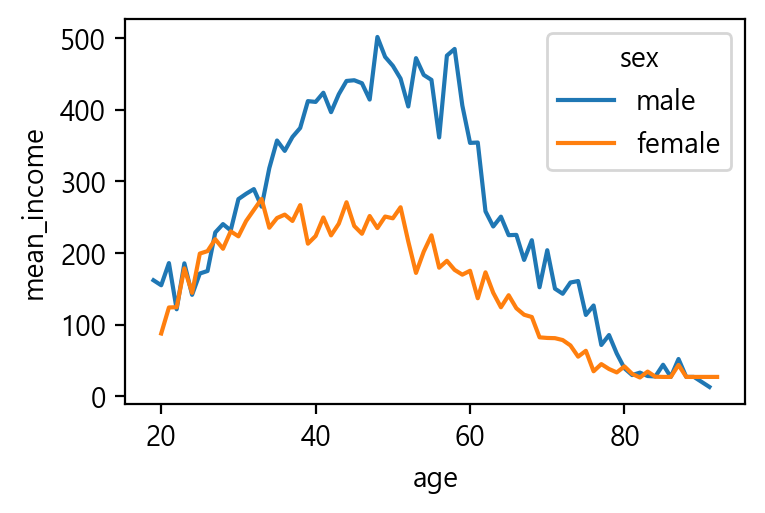

In [74]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

In [75]:
welfare['code_job'].dtypes

dtype('float64')

In [76]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
784.0      2
122.0      2
861.0      1
423.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [77]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Koweps_Codebook_2019.xlsx'

In [78]:
list_job.shape

NameError: name 'list_job' is not defined

In [ ]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [ ]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

In [ ]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

In [ ]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

In [ ]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')


In [ ]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

In [ ]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income') \
   .set(xlim = [0, 800])

In [ ]:
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

In [101]:
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

KeyError: ['job']

In [ ]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

In [100]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

NameError: name 'job_female' is not defined

In [83]:
welfare['religion'].dtypes  # 변수 타입 출력

dtype('O')

In [81]:
welfare['religion'].value_counts() 

religion
no     7815
yes    6603
Name: count, dtype: int64

In [80]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

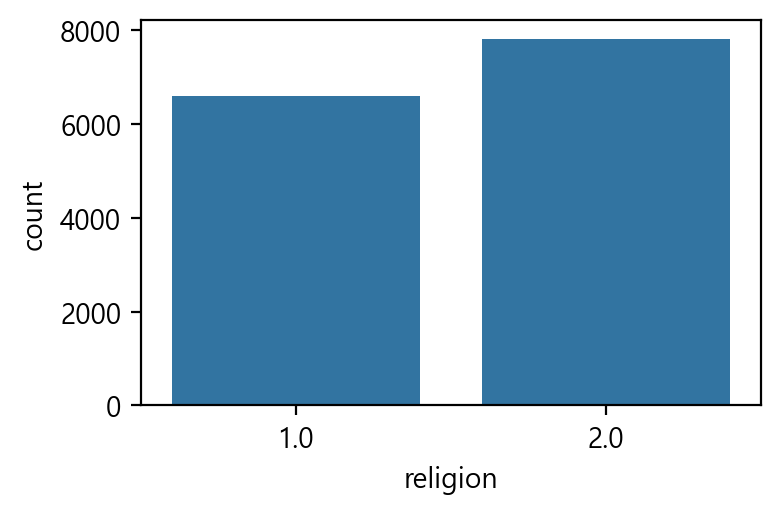

In [79]:
sns.countplot(data = welfare, x = 'religion')

In [85]:
welfare['marriage_type'].dtypes 

dtype('float64')

In [86]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [87]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [88]:
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

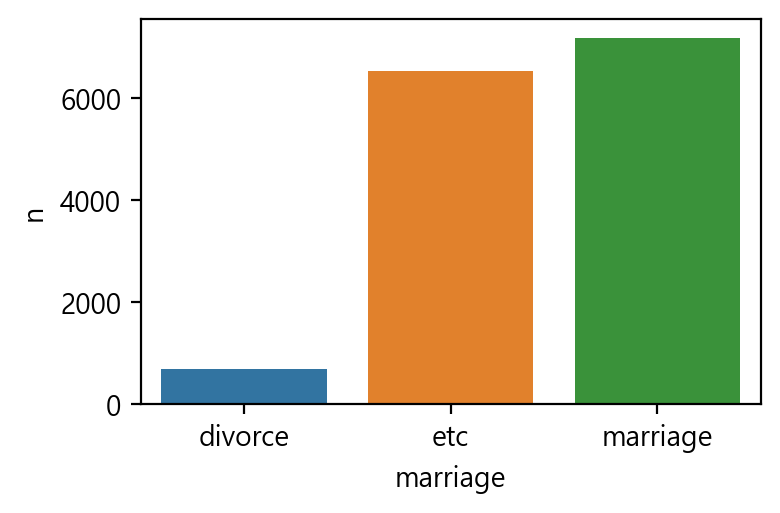

In [90]:
sns.barplot(data = n_divorce, x = 'marriage', y = 'n',hue= 'marriage')

In [99]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


In [ ]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

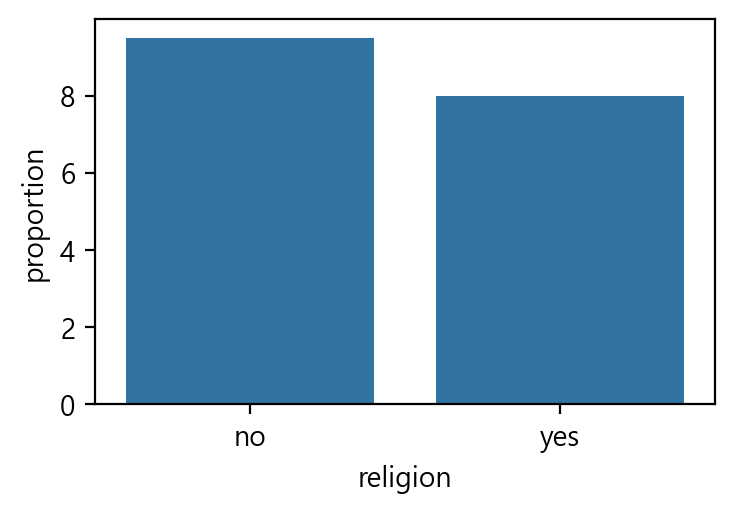

In [96]:
sns.barplot(data = rel_div, x = 'religion', y = 'proportion') 


In [102]:
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.91
1,middle,divorce,0.09
2,old,marriage,0.91
3,old,divorce,0.09
4,young,marriage,0.95
5,young,divorce,0.05


In [103]:
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [104]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

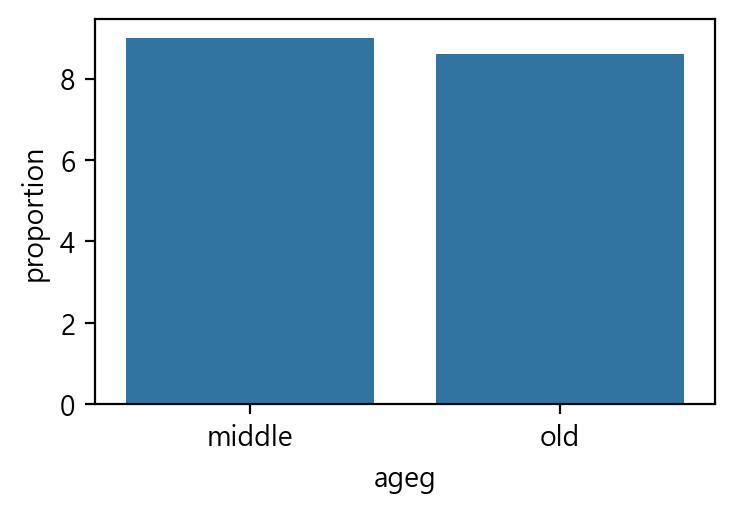

In [105]:
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

In [106]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.90
1,middle,no,divorce,0.10
2,middle,yes,marriage,0.92
3,middle,yes,divorce,0.08
4,old,no,marriage,0.90
5,old,no,divorce,0.10
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


In [107]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

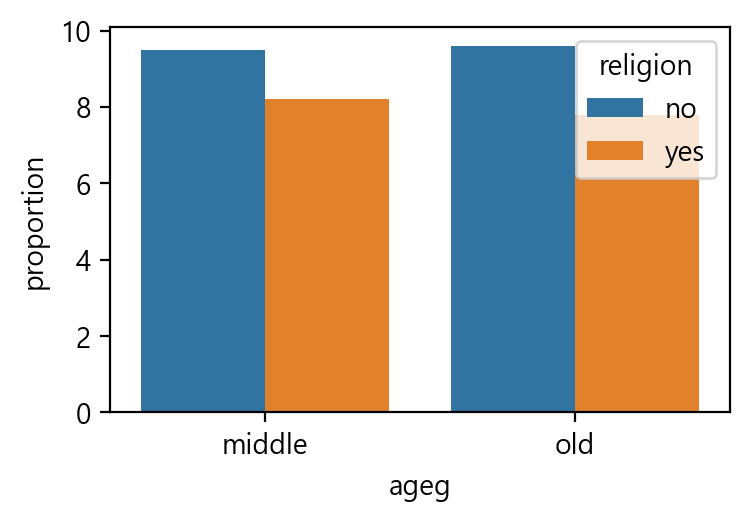

In [108]:
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

In [109]:
welfare['code_region'].dtypes

dtype('float64')

In [110]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [111]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [112]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [113]:
welfare[['code_region', 'region']].value_counts()

code_region  region      
2.0          수도권(인천/경기)      3246
7.0          광주/전남/전북/제주도    2466
3.0          부산/경남/울산        2448
1.0          서울              2002
4.0          대구/경북           1728
5.0          대전/충남           1391
6.0          강원/충북           1137
Name: count, dtype: int64

In [114]:
welfare[['code_region', 'region']].sample(10)

,code_region,region
9676,7.0,광주/전남/전북/제주도
9127,7.0,광주/전남/전북/제주도
4662,5.0,대전/충남
5316,2.0,수도권(인천/경기)
6290,2.0,수도권(인천/경기)
8829,7.0,광주/전남/전북/제주도
3978,2.0,수도권(인천/경기)
13357,3.0,부산/경남/울산
13484,2.0,수도권(인천/경기)
3235,4.0,대구/경북


In [115]:
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.46
1,강원/충북,middle,0.31
2,강원/충북,young,0.23
3,광주/전남/전북/제주도,old,0.45
4,광주/전남/전북/제주도,middle,0.32
5,광주/전남/전북/제주도,young,0.23
6,대구/경북,old,0.50
7,대구/경북,middle,0.30
8,대구/경북,young,0.20
9,대전/충남,old,0.41


In [116]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.91
1,강원/충북,middle,30.87
2,강원/충북,young,23.22
3,광주/전남/전북/제주도,old,44.93
4,광주/전남/전북/제주도,middle,31.79
5,광주/전남/전북/제주도,young,23.28
6,대구/경북,old,50.41
7,대구/경북,middle,29.63
8,대구/경북,young,19.97
9,대전/충남,old,41.34


<Axes: xlabel='proportion', ylabel='region'>

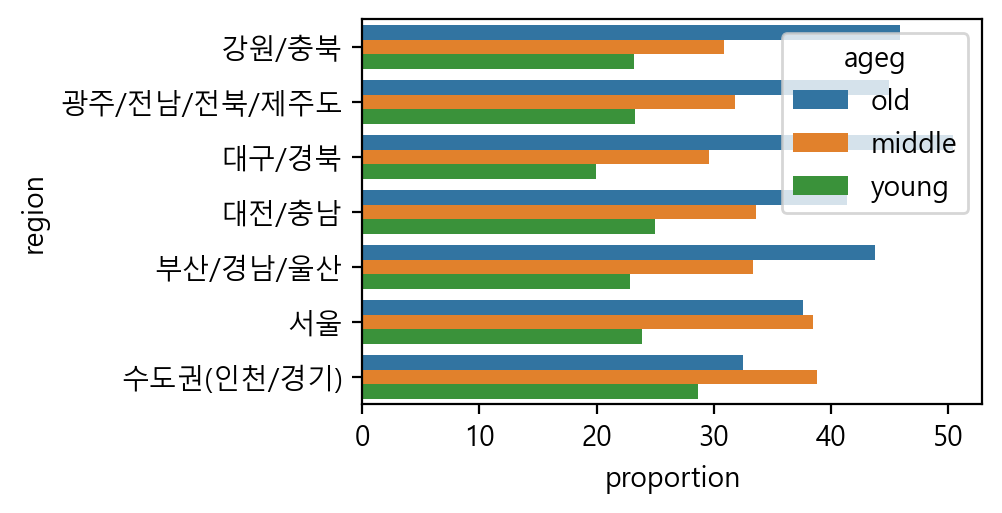

In [117]:
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [118]:
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.87,45.91,23.22
광주/전남/전북/제주도,31.79,44.93,23.28
대구/경북,29.63,50.41,19.97
대전/충남,33.64,41.34,25.02
부산/경남/울산,33.37,43.75,22.88
서울,38.51,37.61,23.88
수도권(인천/경기),38.82,32.50,28.68


<Axes: ylabel='region'>

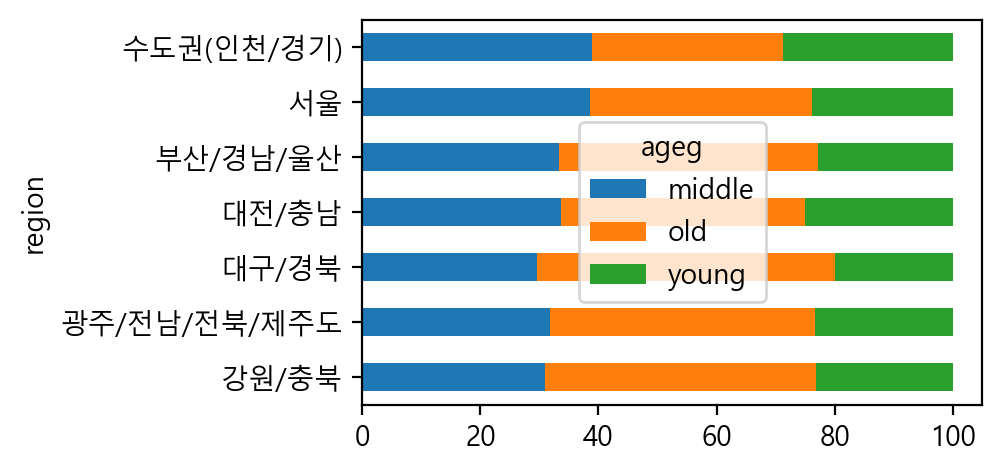

In [119]:
pivot_df.plot.barh(stacked = True)

In [ ]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.68,38.82,32.50
서울,23.88,38.51,37.61
대전/충남,25.02,33.64,41.34
부산/경남/울산,22.88,33.37,43.75
광주/전남/전북/제주도,23.28,31.79,44.93
강원/충북,23.22,30.87,45.91
대구/경북,19.97,29.63,50.41


<Axes: ylabel='region'>

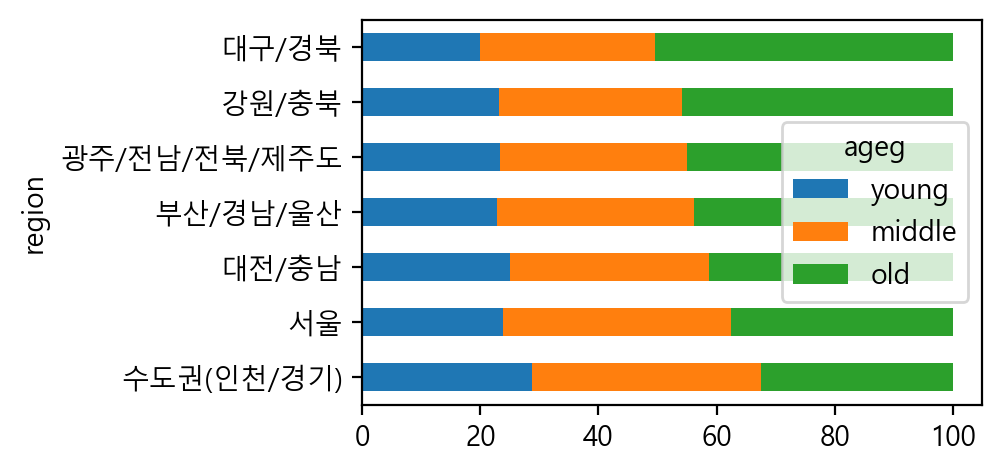

In [ ]:
reorder_df.plot.barh(stacked = True)

<Axes: ylabel='region'>

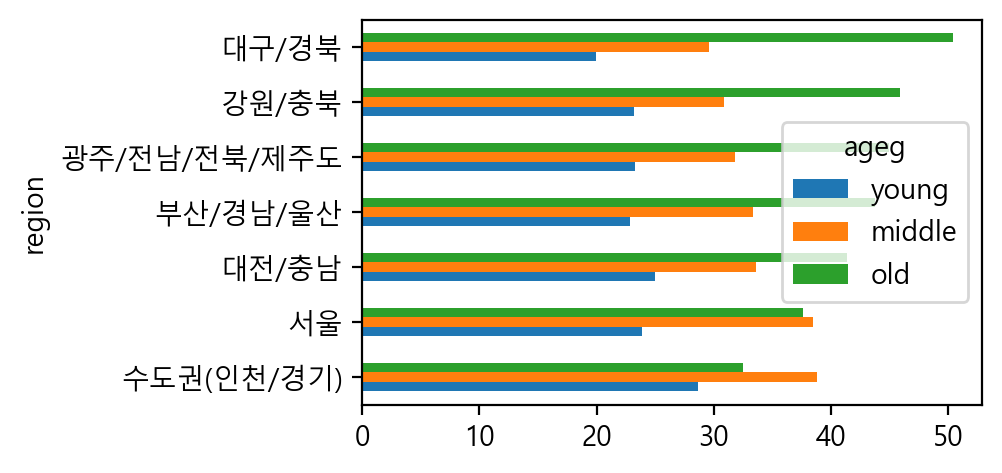

In [124]:
reorder_df.plot.barh()